In [51]:
import pandas as pd
# activity = pd.read_csv('trainer_activity.csv')
activity = pd.read_csv('activity.csv')


In [52]:
import matplotlib.pyplot as plt

def plot_avg_duration(duration_in_seconds):
    avg = activity['watts'].rolling(duration_in_seconds).mean()
    plt.plot(avg, label=f'{duration_in_seconds}s avg Watts')
    
def plot_raw_and_duration(duration_in_seconds):
    
    fig, ax = plt.subplots()
    ax.plot(activity['watts'], label='Raw Watts', color='lightgray')
    
    ax.set_xlabel('Duration [s]')
    ax.set_ylabel('Power [W]')
    plot_avg_duration(duration_in_seconds)
    plt.legend()
    plt.show()

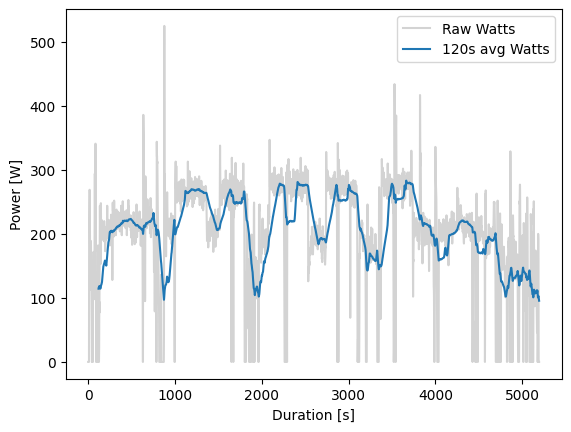

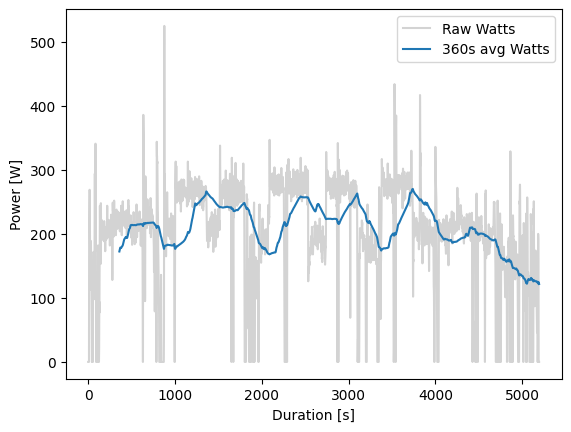

In [53]:
plot_raw_and_duration(120)
plot_raw_and_duration(360)